In [ ]:
from IPython.display import Image

NOTA = 0
q1 = False
q2 = False
q3 = False
q4 = False
q5 = False
q6 = False
q7 = False
q8 = False
q9 = False
q10 = False

In [ ]:
import requests

resp = requests.get("https://rickandmortyapi.com/api/character/2")

if resp.status_code == 200:
  if q1 == False:
    q1 = True
    NOTA += 1
  print(f"Parabéns você acertou! Sua nota até agora é {NOTA}")
else:
  print("Sua resposta ainda não está correta")

Parabéns você acertou! Sua nota até agora é 1


In [ ]:
data = resp.json()
data

{'created': '2017-11-04T18:50:21.651Z',
 'episode': ['https://rickandmortyapi.com/api/episode/1',
  'https://rickandmortyapi.com/api/episode/2',
  'https://rickandmortyapi.com/api/episode/3',
  'https://rickandmortyapi.com/api/episode/4',
  'https://rickandmortyapi.com/api/episode/5',
  'https://rickandmortyapi.com/api/episode/6',
  'https://rickandmortyapi.com/api/episode/7',
  'https://rickandmortyapi.com/api/episode/8',
  'https://rickandmortyapi.com/api/episode/9',
  'https://rickandmortyapi.com/api/episode/10',
  'https://rickandmortyapi.com/api/episode/11',
  'https://rickandmortyapi.com/api/episode/12',
  'https://rickandmortyapi.com/api/episode/13',
  'https://rickandmortyapi.com/api/episode/14',
  'https://rickandmortyapi.com/api/episode/15',
  'https://rickandmortyapi.com/api/episode/16',
  'https://rickandmortyapi.com/api/episode/17',
  'https://rickandmortyapi.com/api/episode/18',
  'https://rickandmortyapi.com/api/episode/19',
  'https://rickandmortyapi.com/api/episode/20'

Parabéns você acertou! Sua nota até agora é 2


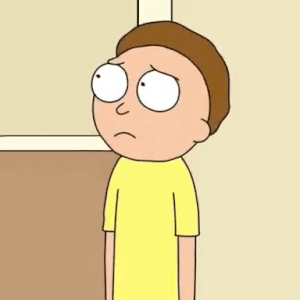

In [ ]:
image = Image(data['image'])

metaData = vars(image)
if metaData['url'] != None:
  if q2 == False:
    q2 = True
    NOTA += 1
  print(f"Parabéns você acertou! Sua nota até agora é {NOTA}")
else:
  print("Sua resposta ainda não está correta")
image

In [ ]:
import pandas as pd

lista = []
i = 1 

while i <= 20:
  values = {"created" : "0",
            "gender" :"1",
          "id": "2",
          "image" :"3",
          "location_name" : "4",
          "location_url" : "5",
          "name" : "6",
          "origin_name":"7",
          "origin_url": "8",
          "species" :"9",
          "status": "10",
          "type" :"11",
          "url" :"12"        
          }
  try:      
    resp = requests.get(f"https://rickandmortyapi.com/api/character/{i}")
    data = resp.json()
    values["created"] = data["created"]
    values["gender"] = data["gender"]
    values["id"] = data["id"]
    values["image"] = data["image"]
    values["location_name"] = data["location"]["name"]
    values["location_url"] = data["location"]["url"]
    values["name"] = data["name"]
    values["origin_name"] = data["origin"]["name"]
    values["origin_url"] = data["origin"]["url"]
    values["species"] = data["species"]
    values["status"] = data["status"]
    values["type"] = data["type"]
    values["url"] = data["url"]

    lista.append(values) 
  except:
    print('ERRO')
   
  i += 1

df = pd.DataFrame(lista)


In [ ]:
if df["name"][0] == 'Rick Sanchez':
  if q3 == False:
    q3 = True
    NOTA += 1.5
  print(f"Parabéns você acertou! Sua nota até agora é {NOTA}")
else:
  print("Sua resposta ainda não está correta")


Parabéns você acertou! Sua nota até agora é 3.5


In [ ]:
baseRegressao = pd.get_dummies(data=df, columns=['gender', 'origin_name', 'species', 'status'])
baseRegressao = baseRegressao.drop(['created', 'id', 'image', 'location_name', 'location_url', 'name', 'origin_url', 'type', 'url',     'gender_Female', 'origin_name_Abadango', 'species_Alien', 'status_Alive', 'location_url', 'status_unknown'], axis=1)
baseRegressao
X = baseRegressao[["gender_Male", "gender_unknown", "origin_name_Earth (C-137)", "origin_name_Earth (Replacement Dimension)", "origin_name_unknown", "species_Human"]]
y  =  baseRegressao[["status_Dead"]]

from sklearn.linear_model import LinearRegression
import numpy as np
reg = LinearRegression().fit(X, y)

In [ ]:
status = reg.predict(np.array([[1, 0, 1, 0, 0, 1]]))
r = round(status[0][0])

if r == 1:
  if q4 == False:
    q4 = True
    NOTA += 1.5
  print(f"Parabéns você acertou! Sua nota até agora é {NOTA}\n")
else:
  print("Sua resposta ainda não está correta")

Parabéns você acertou! Sua nota até agora é 5.0



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
def estaVivo(gender_Male,	gender_unknown,	origin_name_Earth_C_137 ,origin_name_Earth_Replacement_Dimension,	origin_name_unknown,	species_Human):
  status = reg.predict(np.array([[1, 0, 1, 0, 0, 1]]))
  r = round(status[0][0])
  if r == 1:
    status = "vivo"

  return status

In [ ]:
status = estaVivo(1, 0, 1, 0, 0, 1)

if status == "vivo":
  if q5 == False:
    q5 = True
    NOTA += 2
  print(f"Parabéns você acertou! Sua nota até agora é {NOTA}\n")
else:
  print("Sua resposta ainda não está correta")

Parabéns você acertou! Sua nota até agora é 8.0



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('portuguese'))

def remove_mystopwords(sentence):
    tokens = sentence.split(" ")
    word_tokens = word_tokenize(sentence)
    word_tokens = [w for w in word_tokens if not w.lower() in stop_words and not w.isdigit()]
    tokens_filtered = [w for w in word_tokens if not w.lower() in stop_words and not w.isdigit()] 
    return (" ").join(tokens_filtered)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sentence = "Essa sentenca tem a o um dois 213 bugs e o ao que stopwors"

sentence_clean  = remove_mystopwords(sentence)

if sentence_clean == "sentenca dois bugs stopwors":
  if q6 == False:
    q6 = True
    NOTA += 1
  print(f"Parabéns você acertou! Sua nota até agora é {NOTA}\n")
else:
  print("Sua resposta ainda não está correta")

Parabéns você acertou! Sua nota até agora é 8.0

